In [2]:
%matplotlib inline

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from scipy.ndimage import convolve
from collections import Counter
import re

==========================
Working with Images and Text
==========================

In [4]:
tiger_image = imread('data/ds_l4/tiger.jpg')
tiger_image.shape


(600, 580, 3)

In [5]:
tiger_image.dtype

dtype('uint8')

In [6]:
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]


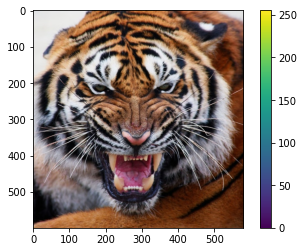

In [7]:
plt.imshow(tiger_image)
plt.colorbar()
plt.show()

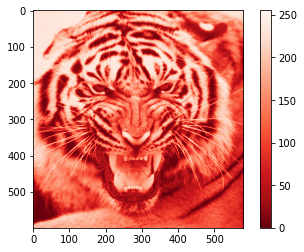

In [8]:
plt.imshow(r, cmap='Reds_r')
plt.colorbar()

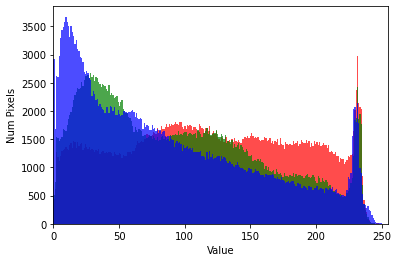

In [9]:
plt.hist(r.ravel(), bins=256, color='r', alpha=0.7)
plt.hist(g.ravel(), bins=256, color='g', alpha=0.7)
plt.hist(b.ravel(), bins=256, color='b', alpha=0.7)

plt.xlim(0, 255)

plt.xlabel('Value')
plt.ylabel('Num Pixels')
plt.show()

In [10]:
# r[r == 20] = 50
# plt.hist(r.ravel(), bins=256, color = 'r', alpha = 0.7)
# plt.hist(g.ravel(), bins=256, color = 'g', alpha = 0.7)
# plt.hist(b.ravel(), bins=256, color = 'b', alpha = 0.7)
# 
# plt.xlim(0,255)
# 
# plt.xlabel('Value')
# plt.ylabel('Num Pixels')
# plt.show()

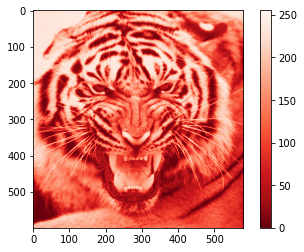

In [11]:
plt.imshow(r, cmap='Reds_r')
plt.colorbar()

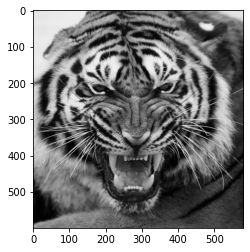

In [12]:
tiger_grayscale = 0.299 * r + 0.587 * g + 0.144 * b
# tiger_grayscale = r + g + b
plt.imshow(tiger_grayscale, cmap='gray')
# plt.imshow(tiger_grayscale)
plt.show()

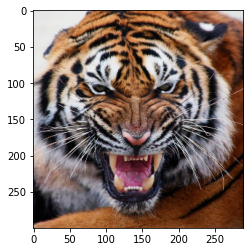

In [13]:
plt.imshow(tiger_image[::2, ::2, :],
           cmap='gray')  # Now we took 4 times less pixels to work with. This is down sampling.

In [14]:
np.product(tiger_image.shape)

1044000

In [15]:
np.product(tiger_image[::2, ::2, :].shape)

261000

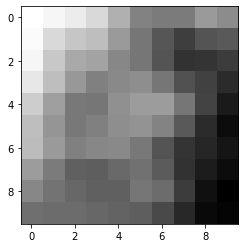

In [16]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)
tiger_sample
plt.imshow(tiger_sample, cmap='gray')  #

In [17]:
conv_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

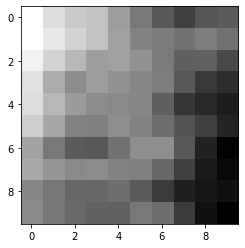

In [18]:
res = convolve(tiger_sample, conv_filter)
plt.imshow(res, cmap='gray')  #

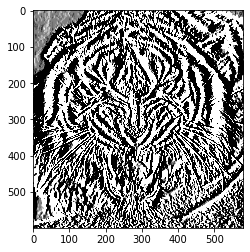

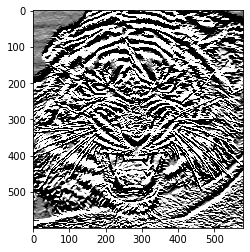

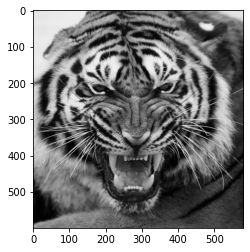

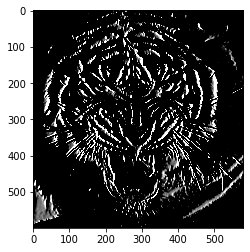

In [49]:
# conv_filt = np.ones([16, 16]) / 256   # filter radius
conv_filt = np.array([  #soberl filter
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])
res = convolve(tiger_grayscale, conv_filt)
res_one = convolve(tiger_grayscale, conv_filt.T)
plt.imshow(res, cmap='gray', vmin=-5, vmax=5)  # increase contrast
plt.show()
plt.imshow(res_one, cmap='gray', vmin=-10, vmax=10)  # increase contrast
plt.show()  #
plt.imshow(tiger_grayscale, cmap='gray')  #
plt.show()  #
plt.imshow((res - tiger_grayscale), cmap='gray', vmin=-20, vmax=20)
plt.show()

In [42]:
# img[img < 40] = 0
# img[img > 215] = 255
# y = 43/35x - 48 #math function of a line with y1=0, y2=255  and x1=40, x2 = 215
thresholded = tiger_grayscale.copy()
thresholded[thresholded < 100] = 0
thresholded[thresholded >= 100] = 255

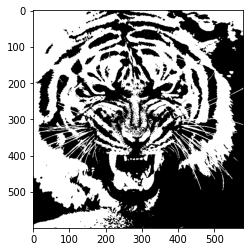

In [44]:
plt.imshow(thresholded, cmap='gray')
plt.show()

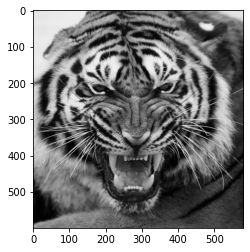

In [50]:
plt.imshow(tiger_grayscale / tiger_grayscale.mean(), cmap='gray')
plt.show()

Standartisation:

In [52]:
tiger_standartized = (tiger_grayscale - tiger_grayscale.mean()) / tiger_grayscale.std(ddof=1)
tiger_standartized.mean(), tiger_standartized.std(ddof=1)

(-1.1858713245099603e-16, 1.0)

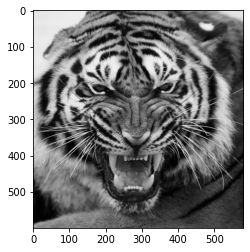

In [53]:
plt.imshow(tiger_standartized, cmap='gray')

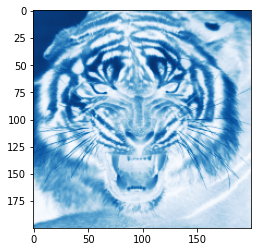

In [61]:
new = resize(tiger_grayscale, (200, 200))
plt.imshow(new, cmap='Blues')

In [62]:
with open('data/ds_l4/alice.txt') as f:
    text = f.read()

In [70]:
char_counter = Counter(text)

In [76]:
characters = char_counter.most_common(20)

Text(0, 0.5, 'Count')

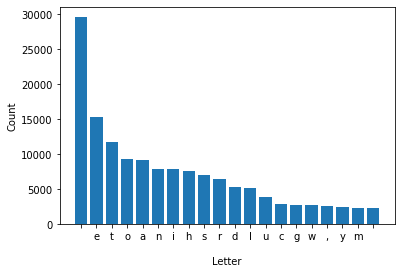

In [82]:
plt.bar([k for k, v in characters], [v for k, v in characters])
plt.xlabel('Letter')
plt.ylabel('Count')

In [114]:
words = re.split('\W+', text)
words = [w.lower() for w in words]
# words_ = re.findall(r'\b[A-Za-z]+\b', text)
word_counter = Counter(words)
# word__counter = Counter(words_)
word_counter.most_common(20)

[('the', 1825),
 ('and', 944),
 ('to', 809),
 ('a', 695),
 ('of', 632),
 ('it', 610),
 ('she', 553),
 ('i', 546),
 ('you', 481),
 ('said', 462),
 ('in', 432),
 ('alice', 404),
 ('was', 358),
 ('that', 330),
 ('as', 274),
 ('her', 248),
 ('with', 228),
 ('at', 227),
 ('s', 222),
 ('t', 218)]

In [115]:
word_counter['we']

43